In [1]:
import pandas
import numpy
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from datetime import datetime

start_date = ''
end_date = ''
zone_id = 2

In [34]:
def remove_comma(df: pandas.DataFrame):
    for column in df.columns:
        df[column].replace(regex=True, inplace=True, to_replace=r',', value='')

def preprocess_data(df_ld):
    df_ld.drop(['zone_id', 'year', 'month', 'day'], axis=1, inplace=True)
    df_ld.dropna(axis=0, how='any', inplace=True)
    df_ld.reset_index(drop=True, inplace=True)
    remove_comma(df_ld)
    df_ld = df_ld.apply(pandas.to_numeric)
    return df_ld

def scale_data(data):
    temp_data = data.copy()
    scaler = MinMaxScaler()
    temp_data[temp_data.columns] = scaler.fit_transform(temp_data[temp_data.columns])
    return temp_data

In [65]:
load_data = pandas.read_csv('data/Load_history.csv')
load_data = load_data[load_data.zone_id==zone_id]
load_data_with_date = load_data.copy()
date_str = load_data['year'].map(str) + '-' + load_data['month'].map(str)+ '-' + load_data['day'].map(str)
load_data = preprocess_data(load_data)
load_data_with_date['date'] = date_str
display("Statistical description of load data.")
display(load_data.describe())
scaled_load_data = scale_data(load_data)

'Statistical description of load data.'

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,...,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,148666.057377,144178.941362,141958.784994,141981.357503,145195.691047,153822.560530,168485.023960,179020.273644,181849.812106,183901.019546,...,183763.238966,183893.740858,186606.999369,192268.093317,194494.642497,193850.259142,192205.437579,184908.505044,171459.808953,157428.989912
std,26255.332378,27038.409562,27893.039811,28957.834712,30436.254832,32638.642198,36444.771747,36393.397895,31511.805692,27939.661983,...,31742.215970,32816.846478,33006.312968,33070.716123,32294.796362,29955.962234,27749.600420,27014.323715,26097.776247,25788.263551
min,86128.000000,82672.000000,84900.000000,85566.000000,87319.000000,92205.000000,93821.000000,104199.000000,116702.000000,125447.000000,...,113269.000000,112053.000000,113650.000000,117021.000000,124364.000000,131867.000000,125464.000000,118255.000000,94179.000000,86707.000000
25%,128784.250000,124081.750000,121801.000000,121186.250000,124095.750000,132591.750000,147441.000000,158410.500000,161528.750000,164030.250000,...,161004.250000,159928.750000,161705.250000,166490.000000,169343.500000,171532.500000,172444.750000,165110.250000,151846.750000,137720.000000
50%,143980.500000,138517.500000,136002.000000,135651.000000,138325.500000,146417.500000,161691.500000,173104.500000,175775.000000,180330.500000,...,176940.500000,177058.000000,180598.500000,188443.500000,191675.500000,190800.500000,188578.000000,181635.000000,168240.500000,153748.500000
75%,164355.000000,159640.500000,156950.250000,157016.750000,161158.750000,171784.250000,188922.500000,199958.750000,199783.000000,200494.500000,...,202866.750000,203896.000000,208274.250000,215068.250000,217058.500000,213784.000000,210285.750000,202505.250000,188881.500000,174294.000000
max,267498.000000,267530.000000,268765.000000,272907.000000,280315.000000,285524.000000,295967.000000,321509.000000,309950.000000,297664.000000,...,304590.000000,304651.000000,301725.000000,294366.000000,301232.000000,302880.000000,302467.000000,293920.000000,281024.000000,270785.000000


In [36]:
def plot_correlation_matrix(data, correlations):
    names = data.columns
    fig = plt.figure(figsize=(40, 20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = numpy.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

In [37]:
# window the data using your windowing function
def window_transform_series(series, window_size):
    # containers for input/output pairs
    X = []
    y = []
    for window in range(len(series) - window_size):
        X.append(series[window:window+window_size])
        y.append(series.iloc[[window + window_size]])
    true_data = []
    for elem in X:
        temp_list = []
        for column in elem.columns:
            temp_list.append(elem[column])
        true_data.append(temp_list)
    X = true_data
    X = numpy.asarray(X)
    true_data = []
    for elem in y:
        true_data.append(numpy.asarray(elem))
    y = true_data
    y = numpy.asarray(y)
    y.shape = (len(y),24)
    return X,y

window_size = 10
X,y = window_transform_series(series = scaled_load_data, window_size = window_size)

In [38]:
train_test_split = int(numpy.ceil(4*len(y)/float(5)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = numpy.asarray(numpy.reshape(X_train, (X_train.shape[0], window_size, 24)))
X_test = numpy.asarray(numpy.reshape(X_test, (X_test.shape[0], window_size, 24)))
y_train = numpy.asarray(y_train)
y_test = numpy.asarray(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1261, 10, 24) (1261, 24) (315, 10, 24) (315, 24)


In [39]:
### TODO: create required RNN model
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
import keras

# given - fix random seed - so we can all reproduce the same results on our default time series
numpy.random.seed(0)

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True, dropout=0.15, recurrent_dropout=0.1))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True, dropout=0.15, recurrent_dropout=0.1))
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2]), dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(24))

# build model using keras documentation recommended optimizer initialization
optimizer = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 100)           50000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 100)           80400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                2424      
Total params: 213,224
Trainable params: 213,224
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1)
#model.save_weights('model_weights/best_RNN_weights.hdf5')

Epoch 1/100
1261/1261 [==============================] - 3s 2ms/step - loss: 0.0493

In [41]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))
testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.00404703266059
testing error = 0.0052874576463


In [42]:
def plot_per_hour_basis(predicted_output, expected_output):
    plt.figure(figsize=(24, 40))
    for i in range(24):
        plt.subplot(12, 2, i+1)
        plt.plot(expected_output[0: len(predicted_output), i])
        plt.plot(predicted_output[0: len(predicted_output), i])
        plt.title("Hour " + str(i+1) + " Average Prediction: " + str(numpy.mean(predicted_output[0: len(predicted_output), i])) + "     Average Actual: " + str(numpy.mean(expected_output[0: len(predicted_output), i])))
        plt.tight_layout()
    plt.show()

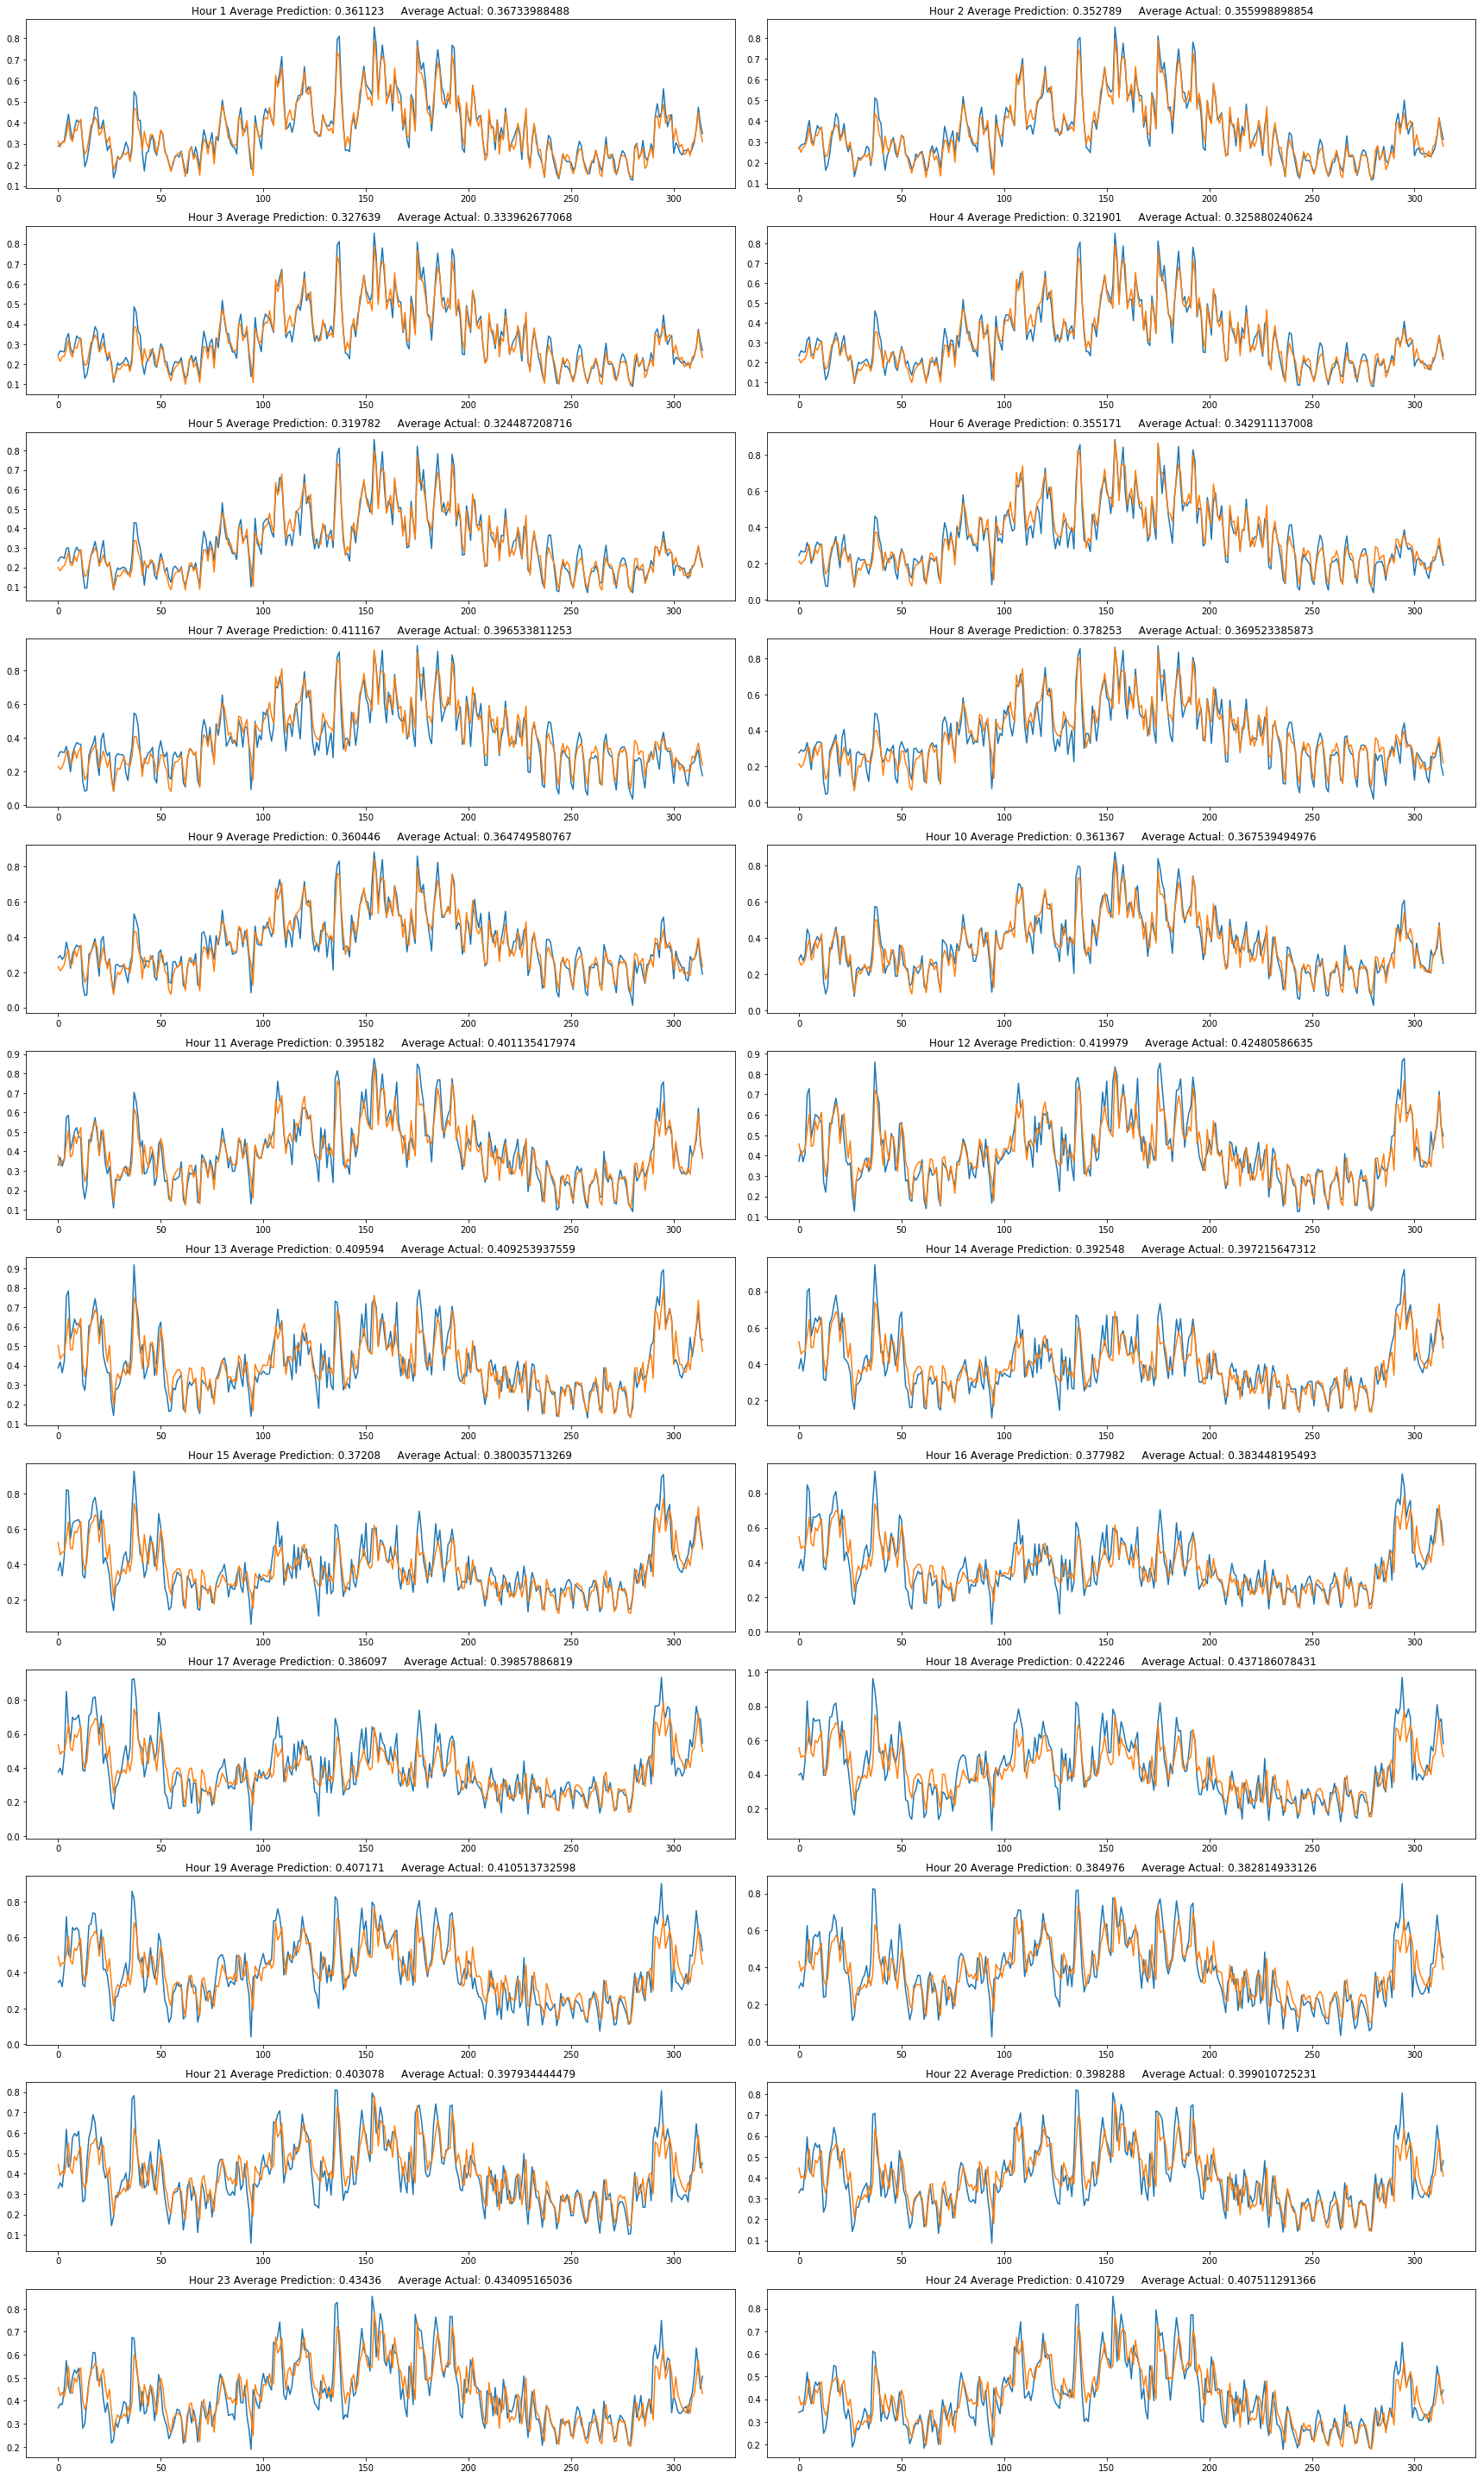

In [43]:
plot_per_hour_basis(test_predict, y_test)

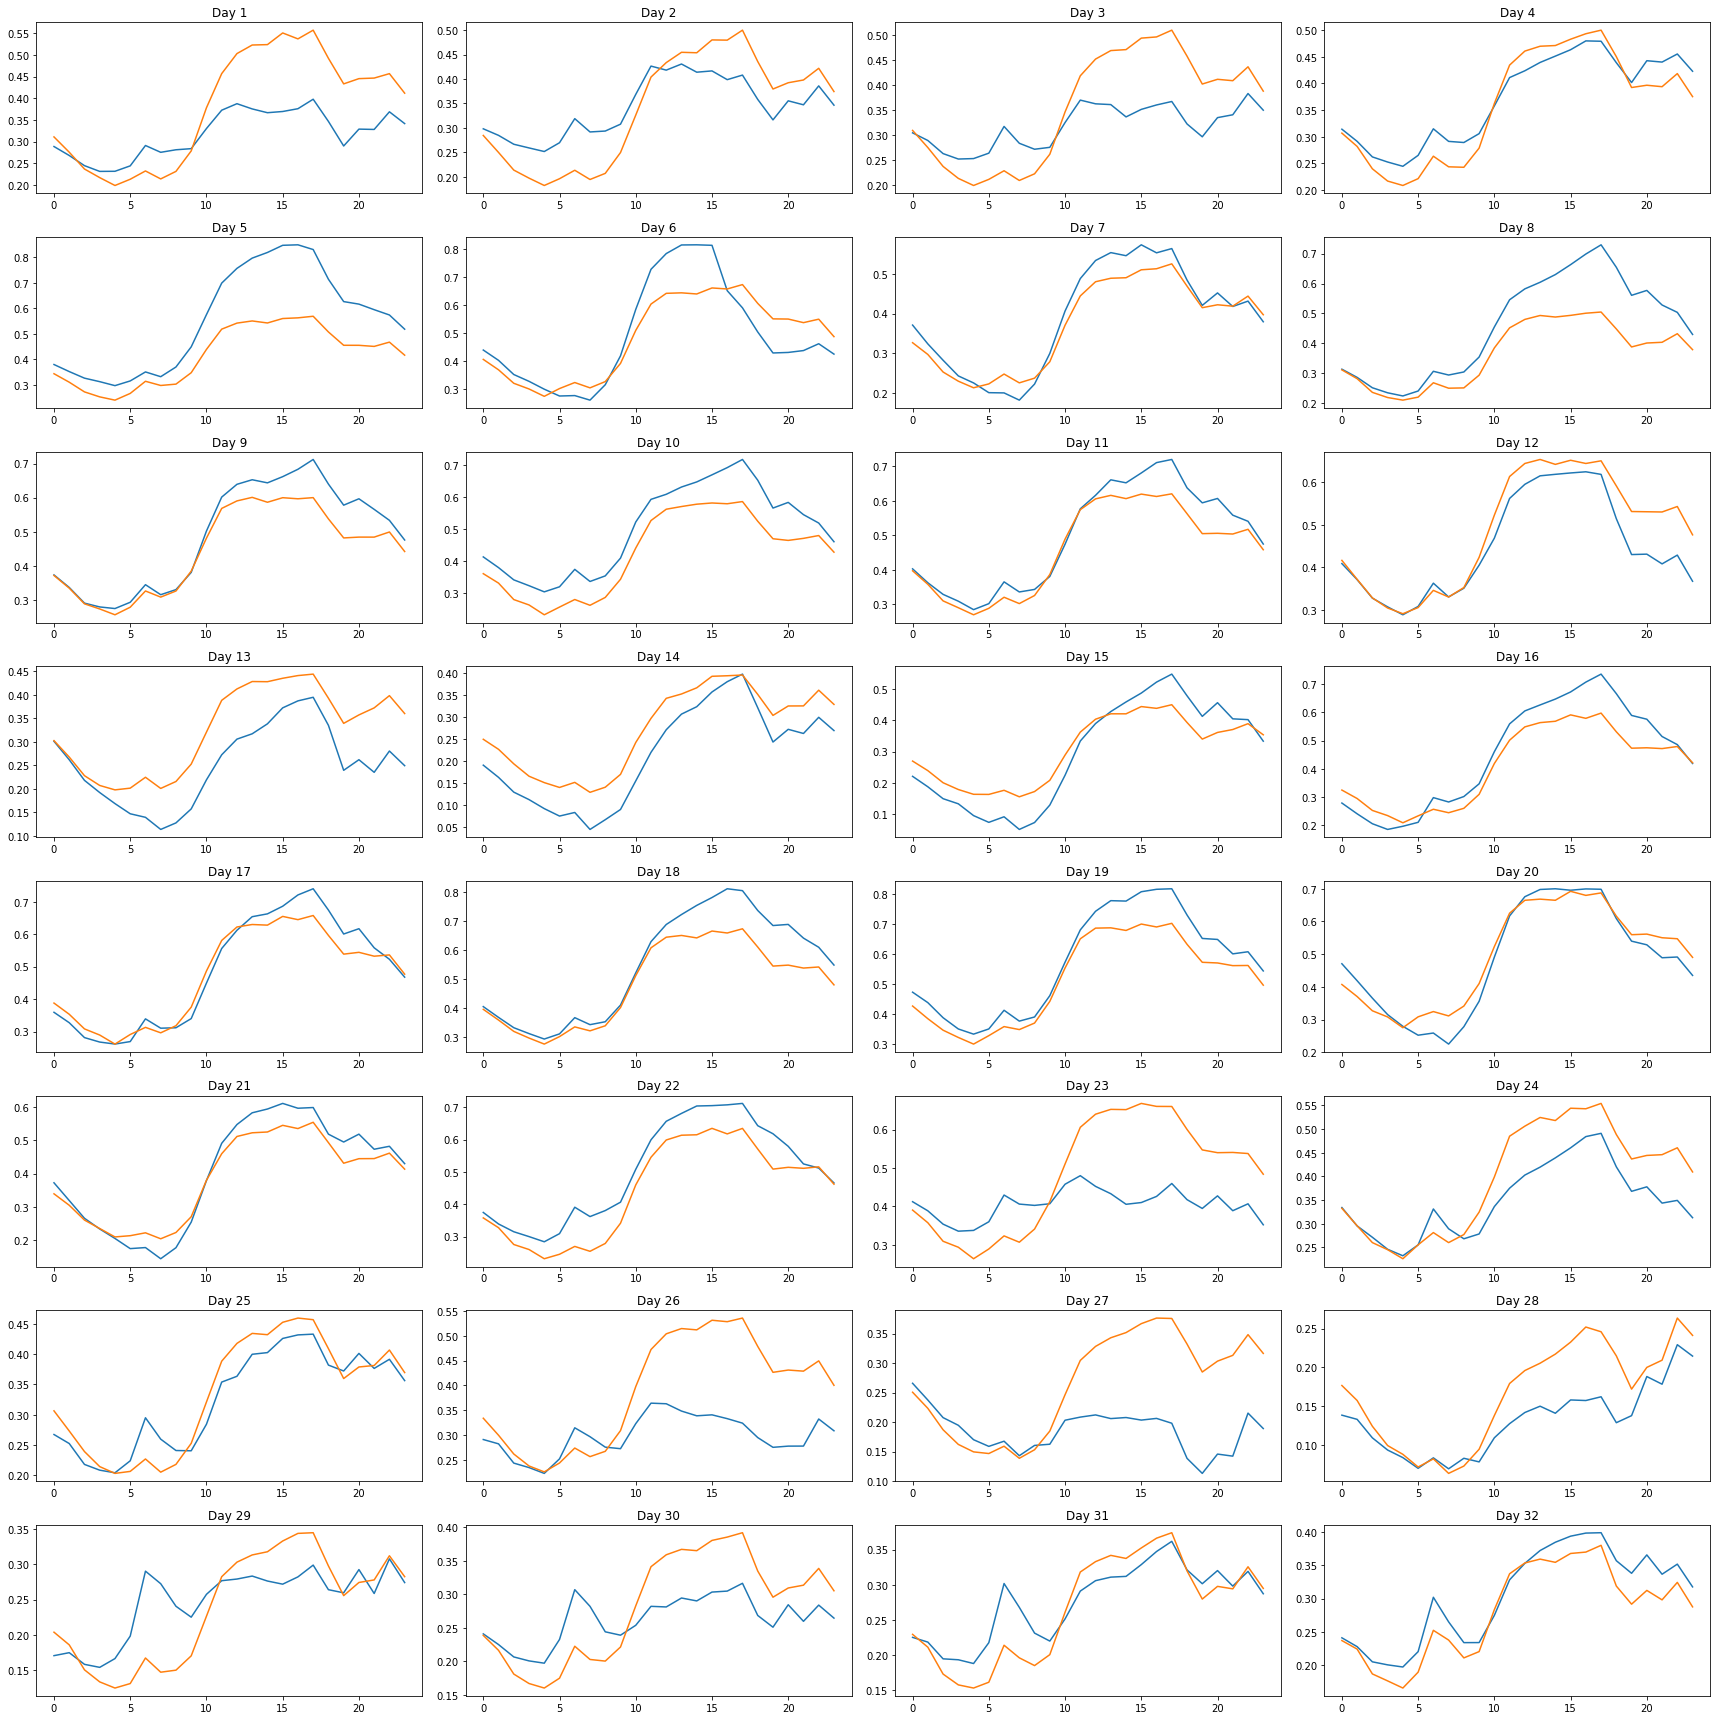

In [44]:
def plot_per_day_basis(predicted_output, expected_output):
    predicted_per_day_list = numpy.asmatrix(predicted_output).transpose()
    expected_per_day_list = numpy.asmatrix(expected_output).transpose()
    plt.figure(figsize=(24, 24))
    for i in range(32):
        plt.subplot(8, 4, i+1)
        plt.plot(expected_per_day_list[0:24, i])
        plt.plot(predicted_per_day_list[0: 24, i])
        plt.title("Day " + str(i+1))
        plt.tight_layout()
    plt.show()
plot_per_day_basis(test_predict, y_test)

In [45]:
def predict_future(model, input_data, num_days):
    output_list = []
    input_list = input_data
    predicted_data = input_data.copy()
    for _ in range(num_days):
        predicted_data = model.predict(input_list)
        input_list = numpy.delete(input_list[0], obj=0, axis=0)
        input_list = numpy.append(input_list, predicted_data, axis = 0)
        input_list = numpy.asarray(numpy.reshape(input_list, (1, window_size, 24)))
        output_list.append(predicted_data)
    return output_list

In [46]:
model.load_weights('model_weights/best_RNN_weights.hdf5')
input_data = X_test[-1]
input_data = numpy.asarray(numpy.reshape(input_data, (1, window_size, 24)))
num_days = 7
outputs = predict_future(model, input_data, num_days)

In [47]:
def plot_future_prediction(outputs):
    i = 0
    plt.figure(figsize=(24, 24))
    for output in outputs:
        i += 1
        plt.subplot(5, 3, i)
        plt.plot(range(0, 24), output[0])
        plt.title("Day " + str(i))
        plt.tight_layout()
    plt.show()

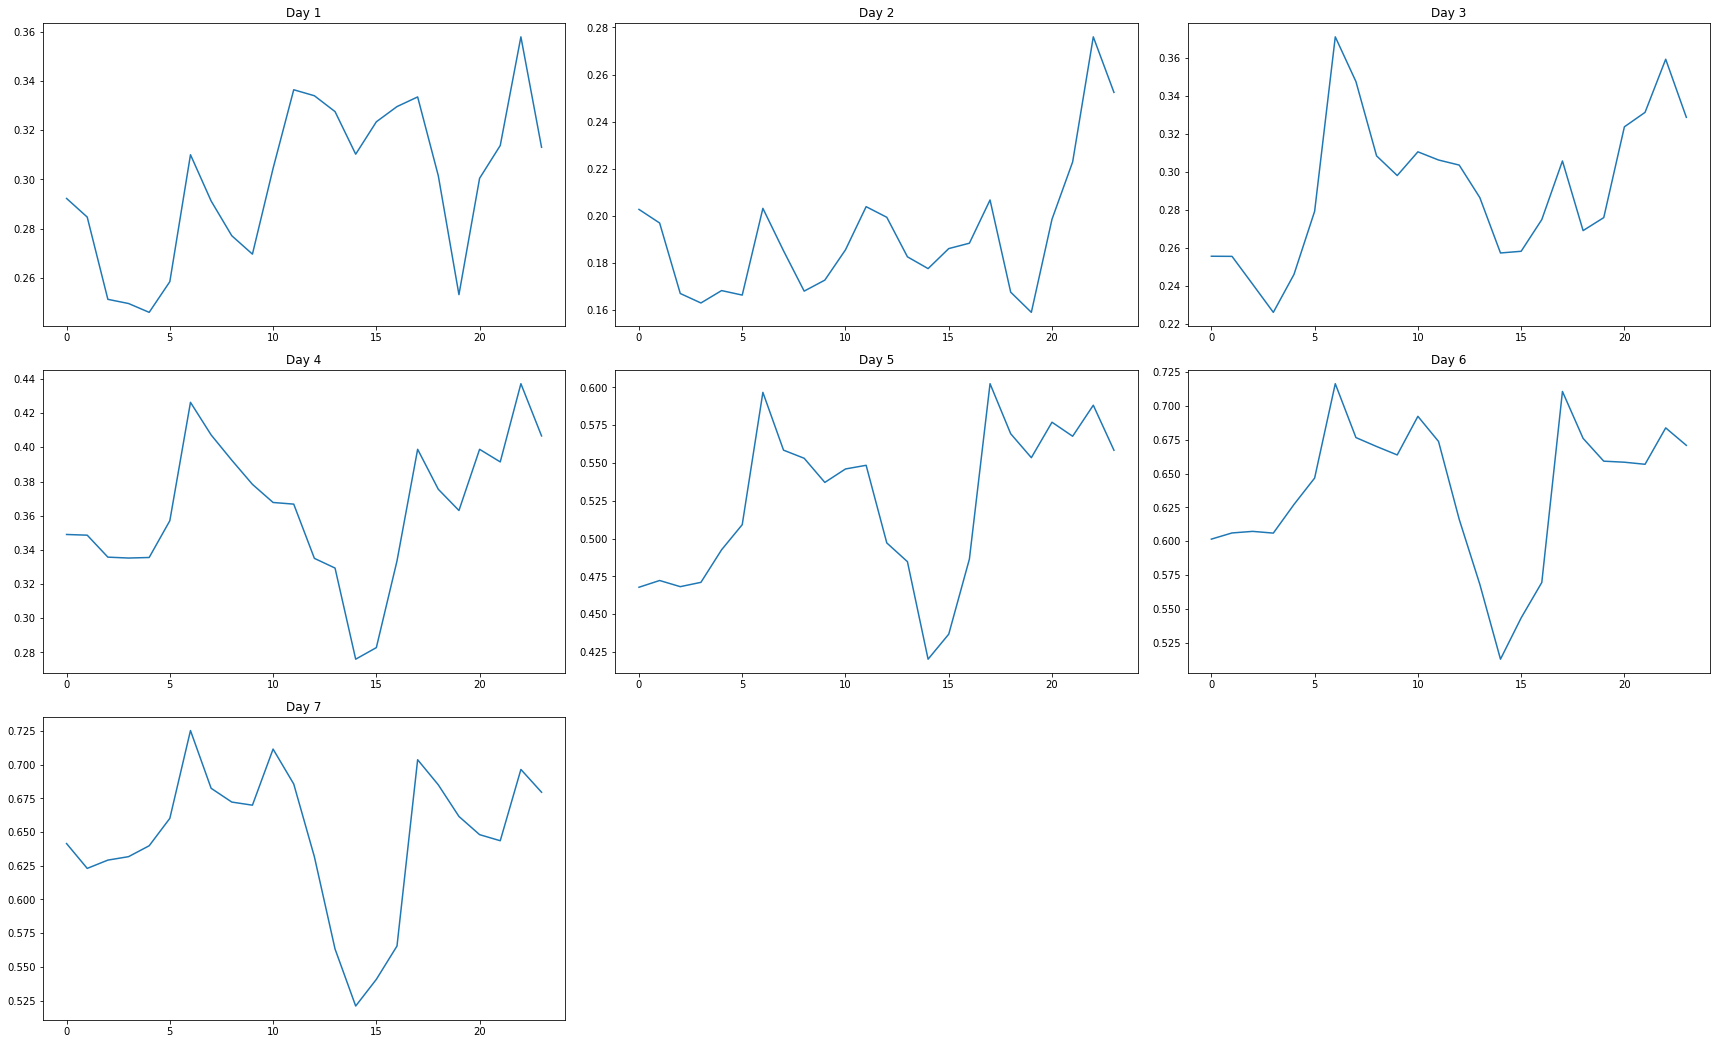

In [48]:
plot_future_prediction(outputs)

In [49]:
def get_data_between_dates(start_date, end_date):
    a = load_data_with_date[load_data_with_date['date'].apply(lambda date: datetime.strptime(date, "%Y-%m-%d")) < datetime(end_date[0], end_date[1], end_date[2])]
    b = a[a['date'].apply(lambda date: datetime.strptime(date, "%Y-%m-%d")) > datetime(start_date[0], start_date[1], start_date[2])]
    return b


In [50]:
def plot_data_between_dates(start_date, end_date):
    data = get_data_between_dates(start_date, end_date)
    data.drop(['date'], axis=1, inplace=True)
    return data

In [67]:
def get_per_hour_data(start_date = (2006, 1, 2), end_date =(2006, 3, 20)):
    model.load_weights('model_weights/best_RNN_weights.hdf5')
    if datetime(start_date[0], start_date[1], start_date[2]) > datetime.strptime(load_data_with_date.loc[load_data_with_date.index[-1]]['date'], "%Y-%m-%d"):
        input_data = X_test[-1]
        num_days = 15
    else:
        data = plot_data_between_dates(start_date, end_date)
        input_data = scaled_load_data.loc[data.index[0] - window_size + 1 - len(scaled_load_data.index: data.index[0]) - len(scaled_load_data.index)]
        display(scaled_load_data.loc[data.index[0] - window_size + 1: data.index[0]])
        num_days = len(data.index) if len(data.index) < 15 else 15
    input_data = numpy.asarray(numpy.reshape(numpy.asarray(input_data), (1, window_size, 24)))
    outputs = predict_future(model, input_data, num_days)
    plot_future_prediction(outputs)
get_per_hour_data()

SyntaxError: invalid syntax (<ipython-input-67-69c87018e57a>, line 8)

## Temperature Analysis

In [ ]:
temperature_data = pandas.read_csv('data/temperature_history.csv')
display(temperature_data.head())
display(temperature_data.describe())


In [ ]:
correlation = temperature_data.corr()
plot_correlation_matrix(temperature_data, correlation)
pandas.tools.plotting.scatter_matrix(temperature_data, figsize=(20, 20))